<font style="font-size:28px;" align="left"><b> Quantum walk </b></font>
<br>

In [1]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

# Define the number of position qubits (3 qubits for 8 nodes)
n_position_qubits = 3

# Define a single step of the quantum walk
def quantum_walk_step(qc, n_position_qubits):
    # Hadamard gate on the walker qubit
    qc.h(n_position_qubits)
    
    # Controlled X gates to shift position
    for i in range(n_position_qubits):
        qc.cx(n_position_qubits, i)
    
    # Apply Hadamard gate to the walker qubit again
    qc.h(n_position_qubits)
    
    # Reflect the walker qubit
    qc.z(n_position_qubits)

In [2]:
# Create the quantum circuit
qc = QuantumCircuit(n_position_qubits + 1, n_position_qubits)

display(qc.draw(reverse_bits=True))

q_3: 
     
q_2: 
     
q_1: 
     
q_0: 
     
c: 3/

In [3]:
# Initial state: set the position qubits to 0 and the walker qubit to 0
# Apply an X gate to the walker qubit to start in state |1> (representing moving right)
qc.x(n_position_qubits)

display(qc.draw(reverse_bits=True))

┌───┐
q_3: ┤ X ├
     └───┘
q_2: ─────
          
q_1: ─────
          
q_0: ─────
          
c: 3/═════

In [4]:
# Apply multiple steps of the quantum walk
num_steps = 3
for _ in range(num_steps):
    quantum_walk_step(qc, n_position_qubits)

display(qc.draw(reverse_bits=True))

┌───┐┌───┐               ┌───┐┌───┐┌───┐               ┌───┐┌───┐┌───┐»
q_3: ┤ X ├┤ H ├──■────■────■──┤ H ├┤ Z ├┤ H ├──■────■────■──┤ H ├┤ Z ├┤ H ├»
     └───┘└───┘  │    │  ┌─┴─┐└───┘└───┘└───┘  │    │  ┌─┴─┐└───┘└───┘└───┘»
q_2: ────────────┼────┼──┤ X ├─────────────────┼────┼──┤ X ├───────────────»
                 │  ┌─┴─┐└───┘                 │  ┌─┴─┐└───┘               »
q_1: ────────────┼──┤ X ├──────────────────────┼──┤ X ├────────────────────»
               ┌─┴─┐└───┘                    ┌─┴─┐└───┘                    »
q_0: ──────────┤ X ├─────────────────────────┤ X ├─────────────────────────»
               └───┘                         └───┘                         »
c: 3/══════════════════════════════════════════════════════════════════════»
                                                                           »
«                    ┌───┐┌───┐
«q_3: ──■────■────■──┤ H ├┤ Z ├
«       │    │  ┌─┴─┐└───┘└───┘
«q_2: ──┼────┼──┤ X ├──────────
«       │  ┌─┴─┐└───┘          
«q_1: ──┼──┤ X ├───────────────
«     ┌─┴─┐└───┘               
«q_0: ┤ X ├────────────────────
«     └───┘                    
«c: 3/═════════════════════════
«

{'111': 50174, '000': 49826}


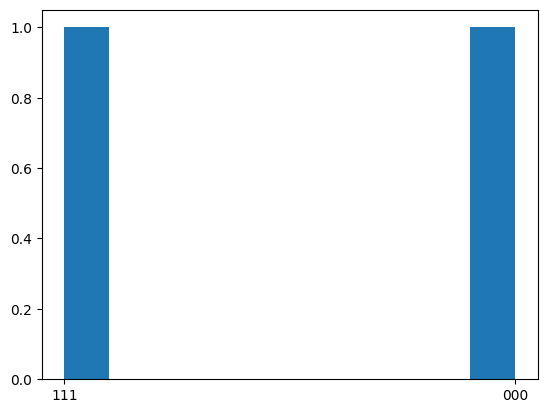

qiskit.result.counts.Counts

In [5]:
# Measure the position qubits
qc.measure(range(n_position_qubits), range(n_position_qubits))

num_shots = 100000
backend = AerSimulator()
comp = transpile(qc, backend) # transpile means transform a quantum circuit into a form that is optimized for execution on a specific quantum backend
job_sim = backend.run(comp, shots=num_shots) # run the circuit
counts = job_sim.result().get_counts(comp) # extract the results of the code execution (how namy counts of which measurement I got)
print(counts)

# Get the counts and plot the histogram

plt.hist(counts)
plt.show()
type(counts)